In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import MissingIndicator

In [2]:
# to do

# clean up dataset once and for all
# add methods used for cleaning
# add del statements

In [3]:
# NOTES
#

In [4]:
# load data into a DataFrame object
df = pd.read_csv('data/kc_house_Data.csv')

In [5]:
# split df into categorical and numerical variable types
df = df.drop(['id'], axis=1)
df_num = df.select_dtypes(include=np.number)
df_cat = df.drop(df_num.columns, axis=1)

In [6]:
# clean up df_cat
df_cat['sqft_basement'] = df_cat['sqft_basement'].replace(to_replace='?', value=np.nan)
df_cat['sqft_basement'] = pd.to_numeric(df_cat['sqft_basement'])
df_num['sqft_basement'] = df_cat['sqft_basement']
df_cat = df_cat.drop(['sqft_basement'], axis = 1)

df_cat['grade'] = df_cat['grade'].map(lambda x: int(x[0]))

df_cat['month_sold'] = df_cat['date'].map(lambda x: int(x.split('/')[0]))
df_cat['year_sold'] = df_cat['date'].map(lambda x: int(x.split('/')[-1]))
df_cat = df_cat.drop(['date'], axis=1)

<ipython-input-6-3bd482b1fbeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['sqft_basement'] = df_cat['sqft_basement']


In [7]:
waterfront = df_cat[['waterfront']]
missing_indicator = MissingIndicator()
missing_indicator.fit(waterfront)
waterfront_missing = missing_indicator.transform(waterfront)
df_cat["waterfront_missing"] = waterfront_missing

df_cat['waterfront'] = df_cat['waterfront'].fillna('NO')
df_cat.waterfront = df_cat.waterfront.eq('YES').mul(1)

In [8]:
condition_dummies = pd.get_dummies(df_cat['condition'], prefix='cond_', drop_first=True)

df_cat = df_cat.drop(['condition'], axis=1)
df_cat = pd.concat([df_cat, condition_dummies], axis=1)

In [9]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   waterfront          21597 non-null  int64 
 1   view                21534 non-null  object
 2   grade               21597 non-null  int64 
 3   month_sold          21597 non-null  int64 
 4   year_sold           21597 non-null  int64 
 5   waterfront_missing  21597 non-null  bool  
 6   cond__Fair          21597 non-null  uint8 
 7   cond__Good          21597 non-null  uint8 
 8   cond__Poor          21597 non-null  uint8 
 9   cond__Very Good     21597 non-null  uint8 
dtypes: bool(1), int64(4), object(1), uint8(4)
memory usage: 949.2+ KB


In [10]:
df_cat.view.isna().sum()

63

In [11]:
df_cat.view = df_cat.view.fillna('NONE')

In [12]:
view_dummies = pd.get_dummies(df_cat.view, prefix='view_', drop_first=True)
df_cat = df_cat.drop(['view'], axis=1)
df_cat = pd.concat([df_cat, view_dummies], axis=1)

In [13]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   waterfront          21597 non-null  int64
 1   grade               21597 non-null  int64
 2   month_sold          21597 non-null  int64
 3   year_sold           21597 non-null  int64
 4   waterfront_missing  21597 non-null  bool 
 5   cond__Fair          21597 non-null  uint8
 6   cond__Good          21597 non-null  uint8
 7   cond__Poor          21597 non-null  uint8
 8   cond__Very Good     21597 non-null  uint8
 9   view__EXCELLENT     21597 non-null  uint8
 10  view__FAIR          21597 non-null  uint8
 11  view__GOOD          21597 non-null  uint8
 12  view__NONE          21597 non-null  uint8
dtypes: bool(1), int64(4), uint8(8)
memory usage: 864.8 KB


In [14]:
df_num.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_basement     454
dtype: int64

In [15]:
df_num.sqft_basement = df_num.sqft_basement.fillna(0)

/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df_num.yr_renovated = df_num.yr_renovated.fillna(0)

In [17]:
df_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [18]:
df_final = pd.concat([df_num, df_cat], axis=1)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21597 non-null  float64
 1   bedrooms            21597 non-null  int64  
 2   bathrooms           21597 non-null  float64
 3   sqft_living         21597 non-null  int64  
 4   sqft_lot            21597 non-null  int64  
 5   floors              21597 non-null  float64
 6   sqft_above          21597 non-null  int64  
 7   yr_built            21597 non-null  int64  
 8   yr_renovated        21597 non-null  float64
 9   zipcode             21597 non-null  int64  
 10  lat                 21597 non-null  float64
 11  long                21597 non-null  float64
 12  sqft_living15       21597 non-null  int64  
 13  sqft_lot15          21597 non-null  int64  
 14  sqft_basement       21597 non-null  float64
 15  waterfront          21597 non-null  int64  
 16  grad

In [20]:
df_final.to_csv('data/df_untransformed.csv', index=False)

In [21]:
!ls

Kelsey_Workbook.ipynb          data_preprocessing.ipynb
README.md                      data_preprocessing2.ipynb
data                           deletefolder
data_preprocessing-noble.ipynb notebook_main.ipynb


In [22]:
!cd data

In [23]:
!ls data

categorical_df.csv   continuous_df.csv    kc_house_data.csv
column_names.md      df_untransformed.csv master_df


In [24]:
df_train = df_final.sample(frac=0.5, random_state=2)
df_test = df_final.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

df_test.shape

(10799, 28)

(array([1.180e+02, 7.540e+02, 1.569e+03, 1.672e+03, 1.502e+03, 1.207e+03,
        1.015e+03, 7.440e+02, 5.600e+02, 4.230e+02, 3.030e+02, 2.020e+02,
        1.260e+02, 6.800e+01, 8.600e+01, 8.600e+01, 3.800e+01, 4.200e+01,
        2.800e+01, 4.200e+01, 2.800e+01, 3.200e+01, 1.600e+01, 2.200e+01,
        1.300e+01, 9.000e+00, 2.000e+00, 8.000e+00, 6.000e+00, 6.000e+00,
        8.000e+00, 8.000e+00, 9.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

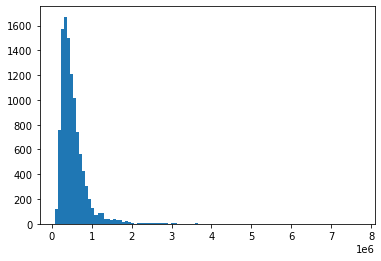

In [25]:
fig, ax = plt.subplots()

ax.hist(y_train, bins=100)

<AxesSubplot:>

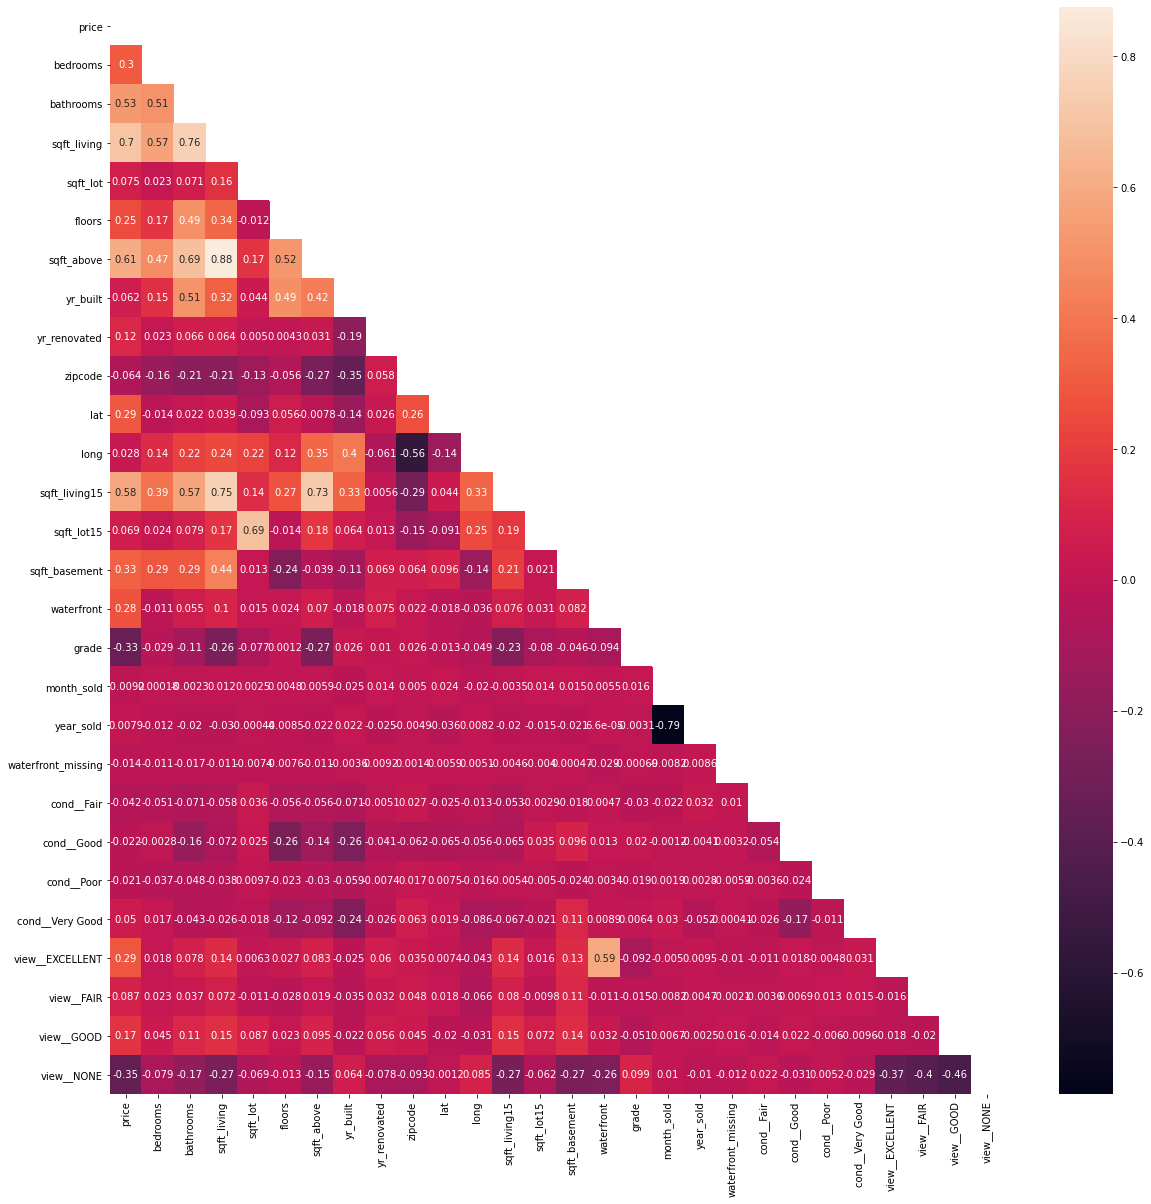

In [26]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

most_correlated_feature = 'sqft_living'
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4966579575861622
Validation score: 0.4845427580134009


In [28]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [29]:
df.shape

(21597, 20)

In [30]:
y_train.shape

(10798,)

# baseline model

In [31]:
from sklearn.dummy import DummyRegressor

# df to sample from for training and testing set
df_sample = df_final # may need to change this depending on df name

df_train = df_sample.sample(frac=0.5, random_state=2)
df_test = df_sample.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_test, y_test)

-0.00020914664819526863

# baseline model using master dataframe

In [32]:
master_df = pd.read_csv('data/master_df')

In [33]:
from sklearn.dummy import DummyRegressor

# df to sample from for training and testing set
df_sample = master_df # may need to change this depending on df name

df_train = df_sample.sample(frac=0.5, random_state=2)
df_test = df_sample.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']



dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_test, y_test)

-5.592480262373023e-05

# functions

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def model_maker(X_train, X_test, y_train, y_test, X_cont):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Scales data
    scalar = StandardScaler()
    X_train[X_cont] = scalar.fit_transform(X_train[X_cont])
    X_test[X_cont] = scalar.transform(X_test[X_cont])
        
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.heatmap(abs(combine.corr()), annot = True)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X_train)
    linreg_model = sm.OLS(y_train, X_train).fit()
    
    #Grabs predictions
    train_predict = linreg_model.predict(X_train)
    test_predict = linreg_model.predict(X_test)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared_adj))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
     
    return linreg_model

In [85]:
def bin_conditions(x):
    if (x == 'Poor') | (x == 'Fair') | (x == 'Average'):
        return 'Low'
    elif x == 'Good':
        return 'Medium'
    else:
        return 'High' 

In [37]:
def normalize(feature):
    return (feature - np.mean(feature)) / np.std(feature)

# train test split

In [38]:
#Splits data in testing and training for evaluation
#X_df = master_df.drop(columns='price')
X_df = master_df[['bathrooms', 'sqft_living']]
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

In [39]:
X_train
y_train.index

Int64Index([10575, 19221, 16368,  2843, 17544, 12596, 19878, 16761, 17843,
            10994,
            ...
            18520, 18214, 15585, 13496,  9225,  4374, 11825, 14740,  9818,
             4041],
           dtype='int64', length=17270)

# establishing 97.5% todo

quantile97 = y_df.iloc[y_train].quantile(.975)
quantile97

s = pd.Series([True, False, True, False, False, True])
s[s].index
s

y_df

y_train

y_df.iloc[y_train]

idx = y_df[((y_df.iloc[y_train] < quantile97))].index

how to get just the true values in this series above

y_df[idx]

y_df.iloc[(y_df.iloc[y_test] < quantile97).index]
#y_train = y_df.iloc[(y_df.iloc[y_train] < quantile97).index]

#y_df.iloc[y_train] < quantile97

# first model

<ipython-input-34-dfb8d4c550e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_cont] = scalar.fit_transform(X_train[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Model R2: 0.1600066042567102
Train MSE: 365204642459.9775
Test MSE: 350703089728.4004
Test for Normality
Test for Heteroskedasticity


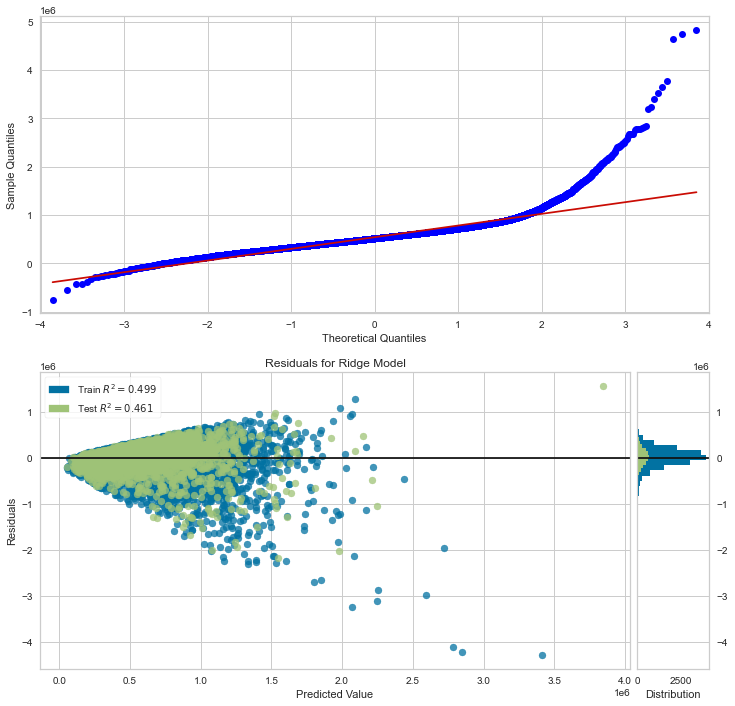

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              1646.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:22:56   Log-Likelihood:                     -2.5440e+05
No. Observations:               17270   AIC:                                  5.088e+05
Df Residuals:                   17268   BIC:                                  5.088e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -4417.6539   7050.011     -0.627      0.531   -1.82e+04    9401.082
sqft_living  2.672e+05   7050.011     37.898      0.000    2.53e+05    2.81e+05
==============================================================================
Omnibus:                    12148.279   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483241.210
Skew:                           2.903   Prob(JB):                         0.00
Kurtosis:                      28.256   Cond. No.                         2.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Splits data in testing and training for evaluation
features_of_interest = ['bathrooms', 'sqft_living']

X_df = master_df[features_of_interest]
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

first_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
first_model.summary()

# zipcode dictionary creation

In [42]:
"""
https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA - match zipcode to name
https://kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_westKC_586.ashx?la=en - zipcode to place
https://web.archive.org/web/20150911054310/https://kingcounty.gov/services/rural-services/rural/community.aspx - match name to rural
https://kingcounty.gov/~/media/depts/executive/performance-strategy-budget/regional-planning/buildable-lands-report/king-county-buildable-lands-report-2014.ashx?la=en
^ for urban and suburban
"""

'\nhttps://www.bestplaces.net/find/zip.aspx?county=53033&st=WA - match zipcode to name\nhttps://kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_westKC_586.ashx?la=en - zipcode to place\nhttps://web.archive.org/web/20150911054310/https://kingcounty.gov/services/rural-services/rural/community.aspx - match name to rural\nhttps://kingcounty.gov/~/media/depts/executive/performance-strategy-budget/regional-planning/buildable-lands-report/king-county-buildable-lands-report-2014.ashx?la=en\n^ for urban and suburban\n'

In [47]:
zipcode_city = {98002 : 'Urban', 98092 : 'Urban', 98178: 'Urban', 98125: 'Urban', 98028:'Suburban',
               98136: 'Urban', 98074: 'Suburban', 98053: 'Urban', 98003: 'Urban',
               98198: 'Suburban', 98146: 'Urban', 98038: 'Suburban', 98007:'Urban', 98115:'Urban',
               98107:'Urban', 98126:'Urban', 98019:'Rural', 98103:'Urban', 98133:'Urban', 98030: 'Urban',
               98119:'Urban', 98112:'Urban', 98052:'Urban', 98027:'Suburban', 98117:'Urban', 98058:'Urban',
               98001:'Urban', 98056:'Urban', 98166:'Urban', 98023:'Urban', 98070:'Rural',
               98148:'Urban', 98105:'Urban', 98042:'Suburban', 98008:'Urban', 98059:'Urban', 98122:'Urban',
               98144:'Urban', 98004:'Urban', 98005:'Urban', 98034:'Urban', 98075:'Suburban',98116:'Urban',
               98010:'Rural', 98118:'Urban', 98199:'Urban', 98040:'Suburban', 98032:'Urban',
               98045:'Rural', 98102:'Urban', 98077:'Rural', 98108:'Urban', 98168:'Urban',
               98177:'Suburban', 98065:'Rural', 98029:'Suburban', 98006:'Urban', 98109:'Urban', 98022:'Rural',
               98033:'Urban', 98155:'Suburban', 98024:'Rural', 98011:'Urban', 98031:'Urban',
               98106:'Urban', 98072:'Suburban', 98188:'Urban', 98014:'Rural', 98055:'Urban', 98039:'Suburban'}

master_df['city_type'] = master_df['zipcode']
master_df['city_type'] = master_df['city_type'].map(zipcode_city)
master_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city_type
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Urban
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Urban
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Suburban
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Urban
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Suburban


# second model - sqft living, bedroom

<ipython-input-34-dfb8d4c550e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_cont] = scalar.fit_transform(X_train[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Model R2: 0.1651010284827692
Train MSE: 362989735310.17664
Test MSE: 348310084760.00806
Test for Normality
Test for Heteroskedasticity


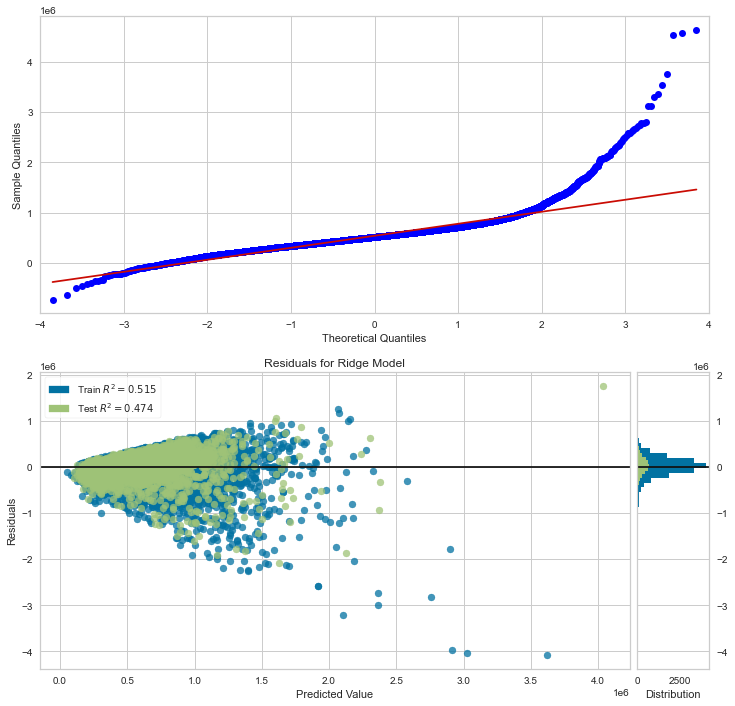

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.165
Model:                            OLS   Adj. R-squared (uncentered):              0.165
Method:                 Least Squares   F-statistic:                              1709.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:30:47   Log-Likelihood:                     -2.5435e+05
No. Observations:               17270   AIC:                                  5.087e+05
Df Residuals:                   17268   BIC:                                  5.087e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living  2.985e+05   5689.039     52.464      0.000    2.87e+05     3.1e+05
bedrooms    -5.851e+04   5689.039    -10.284      0.000   -6.97e+04   -4.74e+04
==============================================================================
Omnibus:                    11750.041   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           425990.817
Skew:                           2.790   Prob(JB):                         0.00
Kurtosis:                      26.683   Cond. No.                         1.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms']

X_df = master_df[features_of_interest]
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

second_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
second_model.summary()

# third model - sqft living, bedroom, city

<ipython-input-34-dfb8d4c550e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_cont] = scalar.fit_transform(X_train[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Model R2: 0.8187863883963002
Train MSE: 78777270772.27304
Test MSE: 71607070848.56534
Test for Normality
Test for Heteroskedasticity


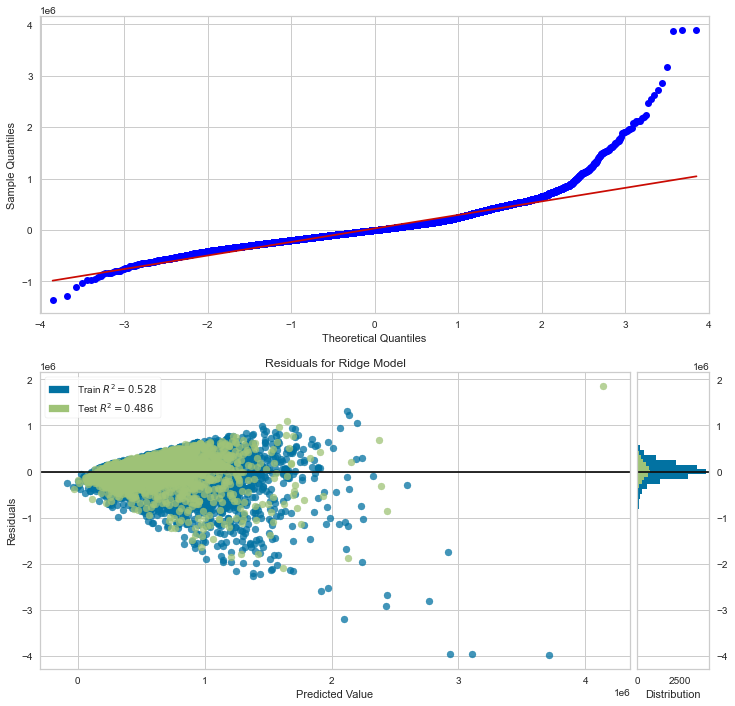

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                          1.951e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:30:50   Log-Likelihood:                     -2.4116e+05
No. Observations:               17270   AIC:                                  4.823e+05
Df Residuals:                   17266   BIC:                                  4.824e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area__Suburban  5.039e+05   4702.976    107.153      0.000    4.95e+05    5.13e+05
area__Urban     5.683e+05   2533.814    224.278      0.000    5.63e+05    5.73e+05
sqft_living     3.172e+05   2673.088    118.666      0.000    3.12e+05    3.22e+05
bedrooms       -7.068e+04   2651.123    -26.659      0.000   -7.59e+04   -6.55e+04
==============================================================================
Omnibus:                     8858.629   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166788.079
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      17.672   Cond. No.                         2.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms']

#categorical data that we want to include in our model
city_df = pd.get_dummies(master_df['city_type'], drop_first=True, prefix='area_')

X_df = pd.concat([city_df, master_df[features_of_interest]], axis=1)
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

third_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
third_model.summary()

# fourth model - sqft living, bedrooms, locations - no high priced homes

<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_cont] = scalar.transform(X_test[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Model R2: 0.8512579345769782
Train MSE: 46709960892.29478
Test MSE: 72124137076.66026
Test for Normality
Test for Heteroskedasticity


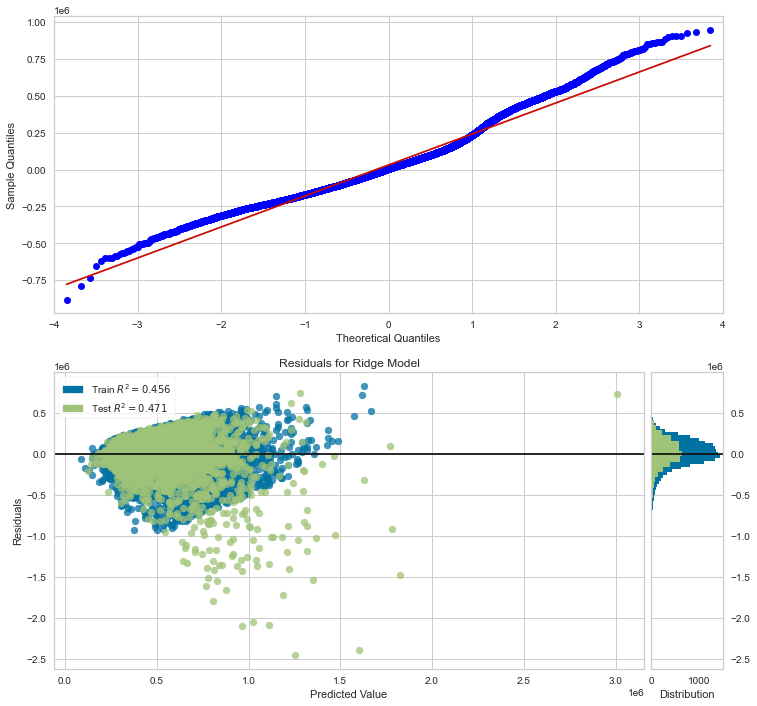

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                          2.409e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:36:41   Log-Likelihood:                     -2.3067e+05
No. Observations:               16834   AIC:                                  4.613e+05
Df Residuals:                   16830   BIC:                                  4.614e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area__Suburban  4.726e+05   3685.122    128.254      0.000    4.65e+05     4.8e+05
area__Urban     5.204e+05   1977.296    263.185      0.000    5.17e+05    5.24e+05
sqft_living     2.017e+05   2098.750     96.092      0.000    1.98e+05    2.06e+05
bedrooms       -4.354e+04   2078.670    -20.947      0.000   -4.76e+04   -3.95e+04
==============================================================================
Omnibus:                     1335.086   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.995
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       3.639   Cond. No.                         2.81
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms']

#categorical data that we want to include in our model
city_df = pd.get_dummies(master_df['city_type'], drop_first=True, prefix='area_')

X_df = pd.concat([city_df, master_df[features_of_interest]], axis=1)
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

#filtering out the high priced homes. we want the lower 97.5%
train = pd.concat([X_train, y_train], axis=1)
price_cutoff = train['price'].quantile(0.975)
train = train[train['price'] < price_cutoff]
X_train = train.drop(columns='price')
y_train = train['price']

third_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
third_model.summary()

# fifth model - sqft living, sqft lot, bedrooms, locations - no high priced homes

<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_cont] = scalar.transform(X_test[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Model R2: 0.8544142400405839
Train MSE: 45716059383.0995
Test MSE: 72310400703.59549
Test for Normality
Test for Heteroskedasticity


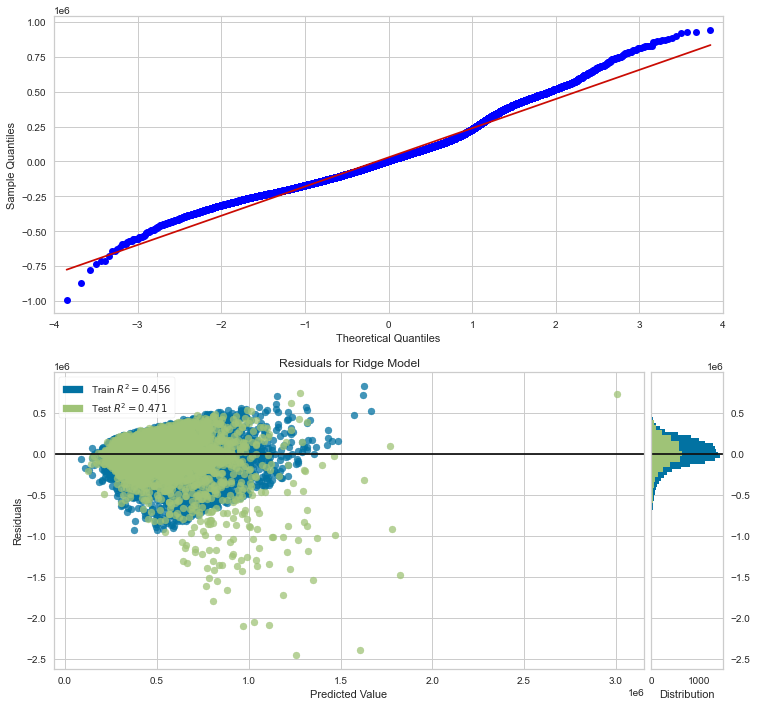

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          1.976e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:42:25   Log-Likelihood:                     -2.3049e+05
No. Observations:               16834   AIC:                                  4.610e+05
Df Residuals:                   16829   BIC:                                  4.610e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area__Suburban  4.717e+05   3646.116    129.380      0.000    4.65e+05    4.79e+05
area__Urban      5.24e+05   1965.212    266.632      0.000     5.2e+05    5.28e+05
sqft_living     1.941e+05   2113.309     91.869      0.000     1.9e+05    1.98e+05
bedrooms       -3.984e+04   2065.602    -19.285      0.000   -4.39e+04   -3.58e+04
sqft_lot        3.232e+04   1689.537     19.128      0.000     2.9e+04    3.56e+04
==============================================================================
Omnibus:                     1192.938   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1508.924
Skew:                           0.661   Prob(JB):                         0.00
Kurtosis:                       3.637   Cond. No.                         2.84
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms', 'sqft_lot']

#categorical data that we want to include in our model
city_df = pd.get_dummies(master_df['city_type'], drop_first=True, prefix='area_')

X_df = pd.concat([city_df, master_df[features_of_interest]], axis=1)
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

#filtering out the high priced homes. we want the lower 97.5%
train = pd.concat([X_train, y_train], axis=1)
price_cutoff = train['price'].quantile(0.975)
train = train[train['price'] < price_cutoff]
X_train = train.drop(columns='price')
y_train = train['price']

third_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
third_model.summary()

# sixth model - fourth model + includes year renovated

In [70]:
is_renovated = []

for value in master_df['yr_renovated']:
    if value > 0:
        is_renovated.append(1)
    else:
        is_renovated.append(0)
        
master_df['is_renovated'] = is_renovated

<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_cont] = scalar.transform(X_test[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Model R2: 0.8530566679743736
Train MSE: 46142356880.96609
Test MSE: 71487203770.99089
Test for Normality
Test for Heteroskedasticity


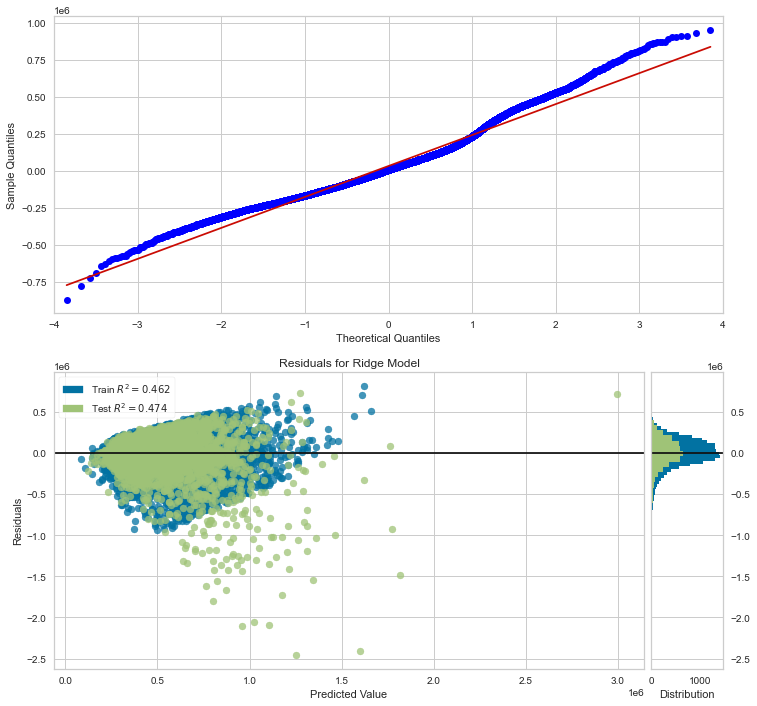

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                          1.955e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:53:57   Log-Likelihood:                     -2.3057e+05
No. Observations:               16834   AIC:                                  4.611e+05
Df Residuals:                   16829   BIC:                                  4.612e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area__Suburban  4.699e+05   3667.841    128.103      0.000    4.63e+05    4.77e+05
area__Urban     5.156e+05   1992.861    258.745      0.000    5.12e+05     5.2e+05
sqft_living     2.005e+05   2087.505     96.067      0.000    1.96e+05    2.05e+05
bedrooms       -4.301e+04   2066.394    -20.814      0.000   -4.71e+04    -3.9e+04
is_renovated    1.368e+05   9507.437     14.388      0.000    1.18e+05    1.55e+05
==============================================================================
Omnibus:                     1291.078   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.551
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                       3.645   Cond. No.                         7.28
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms']

#categorical data that we want to include in our model
city_df = pd.get_dummies(master_df['city_type'], drop_first=True, prefix='area_')

X_df = pd.concat([city_df, master_df[features_of_interest], master_df['is_renovated']], axis=1)
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

#filtering out the high priced homes. we want the lower 97.5%
train = pd.concat([X_train, y_train], axis=1)
price_cutoff = train['price'].quantile(0.975)
train = train[train['price'] < price_cutoff]
X_train = train.drop(columns='price')
y_train = train['price']

third_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
third_model.summary()

In [71]:
master_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city_type,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Urban,0
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Urban,1
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Suburban,0
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Urban,0
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Suburban,0


# seventh model - fourth model + yr built

<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_cont] = scalar.transform(X_test[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Model R2: 0.8540320419201879
Train MSE: 45836075186.65754
Test MSE: 70078383644.749
Test for Normality
Test for Heteroskedasticity


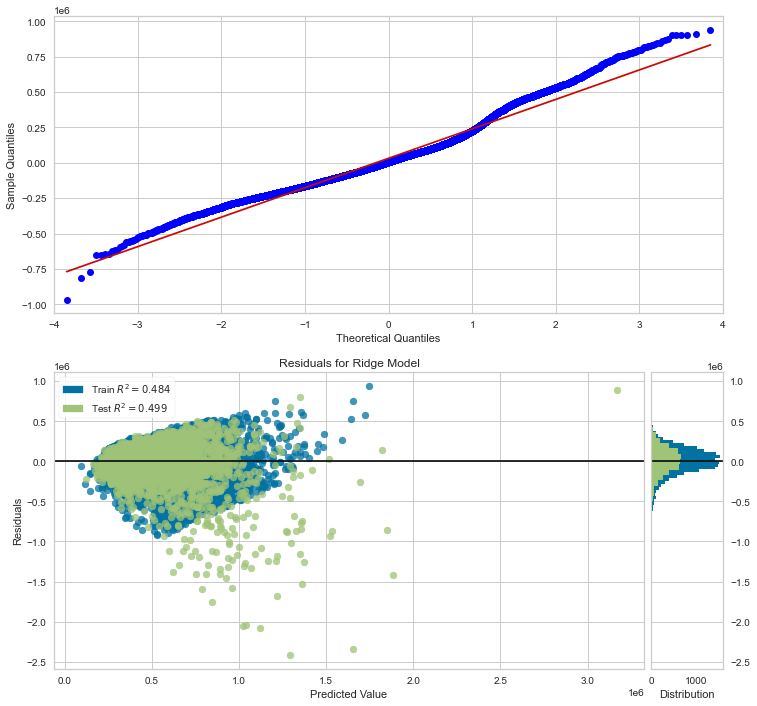

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          1.970e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:58:40   Log-Likelihood:                     -2.3051e+05
No. Observations:               16834   AIC:                                  4.610e+05
Df Residuals:                   16829   BIC:                                  4.611e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area__Suburban  4.824e+05   3690.788    130.694      0.000    4.75e+05     4.9e+05
area__Urban     5.164e+05   1971.212    261.988      0.000    5.13e+05     5.2e+05
sqft_living     2.132e+05   2176.624     97.956      0.000    2.09e+05    2.17e+05
bedrooms       -4.557e+04   2062.314    -22.098      0.000   -4.96e+04   -4.15e+04
yr_built       -3.213e+04   1793.883    -17.912      0.000   -3.56e+04   -2.86e+04
==============================================================================
Omnibus:                     1370.364   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1797.128
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                       3.730   Cond. No.                         3.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms', 'yr_built']

#categorical data that we want to include in our model
city_df = pd.get_dummies(master_df['city_type'], drop_first=True, prefix='area_')

X_df = pd.concat([city_df, master_df[features_of_interest]], axis=1)
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

#filtering out the high priced homes. we want the lower 97.5%
train = pd.concat([X_train, y_train], axis=1)
price_cutoff = train['price'].quantile(0.975)
train = train[train['price'] < price_cutoff]
X_train = train.drop(columns='price')
y_train = train['price']

third_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
third_model.summary()

In [74]:
master_df['yr_built'].min(), master_df['yr_built'].max()

(1900, 2015)

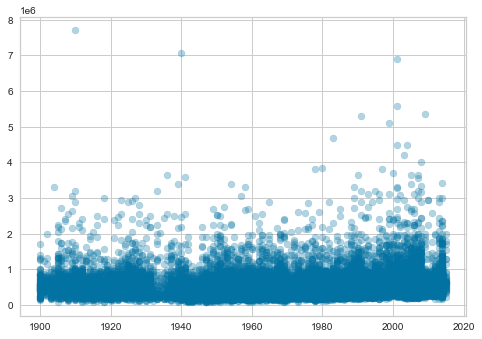

In [78]:
plt.scatter(master_df['yr_built'], master_df['price'], alpha=0.3)

# eighth model - fourth model + condition

<ipython-input-34-dfb8d4c550e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_cont] = scalar.transform(X_test[X_cont])
/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Model R2: 0.8653164962009956
Train MSE: 42290078308.00284
Test MSE: 69861155316.4141
Test for Normality
Test for Heteroskedasticity


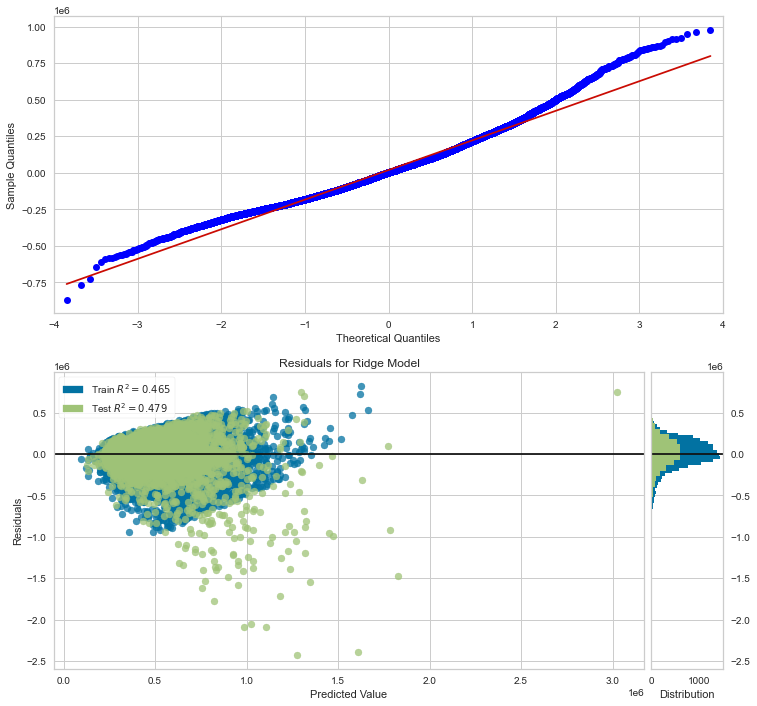

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          1.803e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:17:35   Log-Likelihood:                     -2.2983e+05
No. Observations:               16834   AIC:                                  4.597e+05
Df Residuals:                   16828   BIC:                                  4.597e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area__Suburban  3.049e+05   5341.025     57.080      0.000    2.94e+05    3.15e+05
area__Urban     3.557e+05   4371.148     81.373      0.000    3.47e+05    3.64e+05
cond__Low       1.739e+05   4408.616     39.454      0.000    1.65e+05    1.83e+05
cond__Medium    1.919e+05   5056.778     37.949      0.000    1.82e+05    2.02e+05
sqft_living     1.942e+05   2019.962     96.160      0.000     1.9e+05    1.98e+05
bedrooms       -3.729e+04   1988.431    -18.756      0.000   -4.12e+04   -3.34e+04
==============================================================================
Omnibus:                     1218.631   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1640.932
Skew:                           0.635   Prob(JB):                         0.00
Kurtosis:                       3.851   Cond. No.                         6.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#the features we are interested in for this model
features_of_interest = ['sqft_living', 'bedrooms']

#categorical data that we want to include in our model
city_df = pd.get_dummies(master_df['city_type'], drop_first=True, prefix='area_')
condition_df = pd.get_dummies(master_df['conditions_bin'], drop_first=True, prefix='cond_')

X_df = pd.concat([city_df, condition_df, master_df[features_of_interest]], axis=1)
y_df = master_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=69)

#filtering out the high priced homes. we want the lower 97.5%
train = pd.concat([X_train, y_train], axis=1)
price_cutoff = train['price'].quantile(0.975)
train = train[train['price'] < price_cutoff]
X_train = train.drop(columns='price')
y_train = train['price']

third_model = model_maker(X_train, X_test, y_train, y_test, features_of_interest)
third_model.summary()

In [81]:
master_df['condition'].value_counts()

Average      14014
Good          5675
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [87]:
master_df['conditions_bin'] = master_df['condition'].apply(bin_conditions)
master_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city_type,is_renovated,conditions_bin
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,...,1955,0.0,98178,47.5112,-122.257,1340,5650,Urban,0,Low
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,Urban,1,Low
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,...,1933,0.0,98028,47.7379,-122.233,2720,8062,Suburban,0,Low
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,...,1965,0.0,98136,47.5208,-122.393,1360,5000,Urban,0,High
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,...,1987,0.0,98074,47.6168,-122.045,1800,7503,Suburban,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,360000.0,3,2.50,1530,1131,3.0,NONE,Average,8 Good,1530,...,2009,0.0,98103,47.6993,-122.346,1530,1509,Urban,0,Low
21584,400000.0,4,2.50,2310,5813,2.0,NONE,Average,8 Good,2310,...,2014,0.0,98146,47.5107,-122.362,1830,7200,Urban,0,Low
21585,402101.0,2,0.75,1020,1350,2.0,NONE,Average,7 Average,1020,...,2009,0.0,98144,47.5944,-122.299,1020,2007,Urban,0,Low
21586,400000.0,3,2.50,1600,2388,2.0,NONE,Average,8 Good,1600,...,2004,0.0,98027,47.5345,-122.069,1410,1287,Suburban,0,Low


# NTS 

address the bump for normality

bin zipcode down from 38 locations